# Exploring the CIC-IDS-2018 Dataset
[Official dataset link](https://www.unb.ca/cic/datasets/ids-2018.html)

[Dataset Github processed_friday](https://github.com/tamerthamoqa/cic-ids-2018-intrusion-detection-classification/blob/master/1-Exploring_CIC-IDS-2018_Dataset.ipynb)

Based on the following exploration; The __"Friday-02-03-2018_TrafficForML_CICFlowMeter.csv"__ and __"Friday-16-02-2018_TrafficForML_CICFlowMeter.csv"__ (friday 1 and friday 2) csv files were chosen with the following labels:
* __Benign__ 
* __Bot__ 
* __DoS attacks-SlowHTTPTest__ 
* __DoS attacks-Hulk__ 
* Label (one erroneous row, would need to be removed)

__Reasoning__: The labels are better balanced than the rest of the files. For the purposes of a baseline experiment; it would be satisfactory.

The __Bot__, __DoS attacks-SlowHTTPTest__, and __DoS attacks-Hulk__ labels would be combined into one __"Malicious"__ label for a total of 290,089 __"Malicious"__ instances

The baseline experiment would be a binary classification experiment between __290089 "Malicious"__ instances vs __1074342 "Benign"__ instances: 

Malicious: 21.260%, Benign: 78.739%.

In [10]:
import pandas as pd
import numpy as np
# Import dataset
data = pd.read_csv("/users/mik2002/dataset/processed_friday_dataset.csv")
pd.set_option('display.max_columns', None)
display(data.head(10))
display(data['Label'].value_counts())

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol_17,Protocol_6,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,0,539.000000,655.432936,9.425667e+03,1.906912e+04,73403.0,1.0,141385.0,1.767312e+04,2.396532e+04,73403.0,22.0,51417.0,8569.500000,13036.89082,31525.0,1.0,192,152,63.655975,49.510203,0,1460,254.470588,474.712955,225352.389700,0,0,1,1,0,0,0,1,0,270.375000,61.444444,539.000000,0,0,0,0,0,0,9,553,7,3773,8192,119,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.000000,0.000000,1.405000e+02,1.746554e+02,264.0,17.0,281.0,2.810000e+02,0.000000e+00,281.0,281.0,0.0,0.000000,0.00000,0.0,0.0,40,20,7117.437722,3558.718861,0,38,19.000000,21.939310,481.333333,0,1,0,0,1,0,0,0,0,25.333333,19.000000,0.000000,0,0,0,0,0,0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,0,701.800000,636.314186,1.119296e+04,2.437945e+04,112589.0,1.0,279728.0,2.797280e+04,3.616774e+04,112589.0,94.0,258924.0,18494.571430,36356.50372,133669.0,1.0,232,312,39.310424,53.605123,0,1460,430.111111,566.234209,320621.179500,0,0,1,1,0,0,0,1,1,446.653846,98.727273,701.800000,0,0,0,0,0,0,11,1086,15,10527,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,1.320000e+02,0.000000e+00,132.0,132.0,132.0,1.320000e+02,0.000000e+00,132.0,132.0,0.0,0.000000,0.00000,0.0,0.0,40,0,15151.515150,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,256,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,0,472.384615,611.180489,1.304838e+04,2.631163e+04,114077.0,1.0,273946.0,3.424325e+04,3.799657e+04,114077.0,201.0,252994.0,21082.833330,39075.73819,135611.0,1.0,192,272,32.844797,47.442485,0,1460,322.869565,497.254764,247262.300400,0,0,1,1,0,0,0,1,1,337.545455,142.777778,472.384615,0,0,0,0,0,0,9,1285,13,6141,8192,1047,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
5,250,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,2.500000e+02,0.000000e+00,250.0,250.0,250.0,2.500000e+02,0.000000e+00,250.0,250.0,0.0,0.000000,0.00000,0.0,0.0,40,0,8000.000000,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,251,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
6,5964033,3,1,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,1.988011e+06,3.425210e+06,5943084.0,19.0,5964033.0,2.982016e+06,4.187582e+06,5943084.0,20949.0,0.0,0.000000,0.00000,0.0,0.0,72,32,0.503015,0.167672,0,0,0.000000,0.000000,0.000000,0,0,1,1,0,0,0,1,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,3,0,1,0,8192,29200,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
7,144,2,0,0,0.0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,1.440000e+02,0.000000e+00,144.0,144.0,144.0,1.440000e+02,0.000000e+00,144.0,144.0,0.0,0.000000,0.00000,0.0,0.0,40,0,13888.888890,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,0,0,913,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,

Label
0    1074342
1     290089
Name: count, dtype: int64

In [11]:
print(data['Fwd Byts/b Avg'].value_counts())
print(data['Fwd Pkts/b Avg'].value_counts())
print(data['Fwd Blk Rate Avg'].value_counts())
print(data['Bwd Byts/b Avg'].value_counts())
print(data['Bwd Pkts/b Avg'].value_counts())
print(data['Fwd Blk Rate Avg'].value_counts())
print(data['CWE Flag Count'].value_counts())
print(data['Bwd Blk Rate Avg'].value_counts())

Fwd Byts/b Avg
0    1364431
Name: count, dtype: int64
Fwd Pkts/b Avg
0    1364431
Name: count, dtype: int64
Fwd Blk Rate Avg
0    1364431
Name: count, dtype: int64
Bwd Byts/b Avg
0    1364431
Name: count, dtype: int64
Bwd Pkts/b Avg
0    1364431
Name: count, dtype: int64
Fwd Blk Rate Avg
0    1364431
Name: count, dtype: int64
CWE Flag Count
0    1364431
Name: count, dtype: int64
Bwd Blk Rate Avg
0    1364431
Name: count, dtype: int64


In [12]:
colonne_da_elimare = ['Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg','CWE Flag Count','Bwd Blk Rate Avg']
data = data.drop(columns=colonne_da_elimare)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364431 entries, 0 to 1364430
Data columns (total 66 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1364431 non-null  int64  
 1   Tot Fwd Pkts       1364431 non-null  int64  
 2   Tot Bwd Pkts       1364431 non-null  int64  
 3   TotLen Fwd Pkts    1364431 non-null  int64  
 4   TotLen Bwd Pkts    1364431 non-null  float64
 5   Fwd Pkt Len Max    1364431 non-null  int64  
 6   Fwd Pkt Len Min    1364431 non-null  int64  
 7   Fwd Pkt Len Mean   1364431 non-null  float64
 8   Fwd Pkt Len Std    1364431 non-null  float64
 9   Bwd Pkt Len Max    1364431 non-null  int64  
 10  Bwd Pkt Len Min    1364431 non-null  int64  
 11  Bwd Pkt Len Mean   1364431 non-null  float64
 12  Bwd Pkt Len Std    1364431 non-null  float64
 13  Flow IAT Mean      1364431 non-null  float64
 14  Flow IAT Std       1364431 non-null  float64
 15  Flow IAT Max       1364431 non-n

In [14]:
target = data.iloc[:,-1].values
data = data.iloc[:,:-1]

In [15]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [16]:
# set hyperparameters
x = 75
y = 75
input_len = data.shape[1]
sigma = 1.5
learning_rate = 1.5
iterations = data.shape[0]

In [17]:
from minisom import MiniSom
# initialization
som = MiniSom(x=x,
             y=y,
             input_len=input_len,
             sigma=sigma,
             learning_rate=learning_rate)
som.random_weights_init(data)
#som.pca_weights_init(data)

In [18]:
som.train(data, iterations, verbose=True)  # random training

 [ 1364431 / 1364431 ] 100% - 0:00:00 left 

/users/mik2002/.local/lib/python3.10/site-packages/minisom.py:540: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)



 quantization error: 0.12612509894460458


In [19]:
som.topographic_error(data[:])

0.27893825338181266

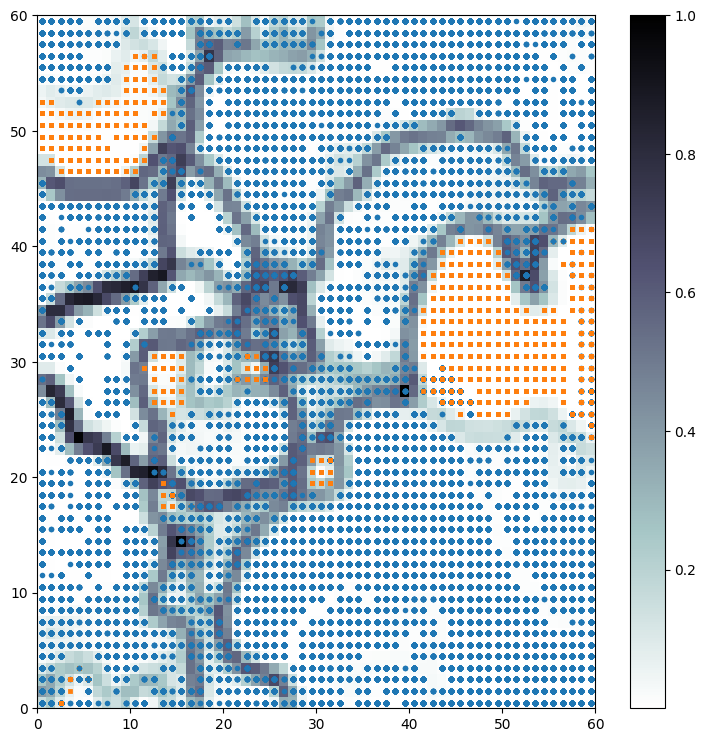

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the processed_friday_dataset
# different colors and markers for each label
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]], markerfacecolor=colors[target[cnt]],
             markeredgecolor=colors[target[cnt]], markersize=2, markeredgewidth=2)

plt.show()

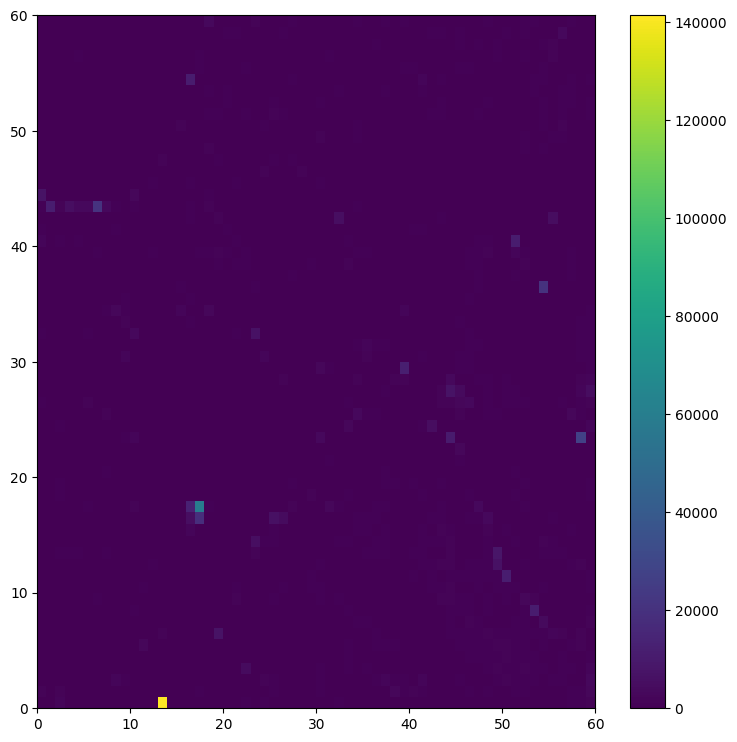

In [21]:
plt.figure(figsize=(9, 9))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T,)
plt.colorbar()
plt.show()

In [22]:
"""
import matplotlib.pyplot as plt
import seaborn as sns
data_corr = pd.concat([data], axis=1)
Var_Corr = data_corr.corr()
plt.figure(figsize=(44, 36))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
plt.show()
"""

'\nimport matplotlib.pyplot as plt\nimport seaborn as sns\ndata_corr = pd.concat([data], axis=1)\nVar_Corr = data_corr.corr()\nplt.figure(figsize=(44, 36))\nsns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)\nplt.show()\n'